# **HW6**
### 2029026 유현수



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.chdir("/content/drive/MyDrive/통프/pytorch data/")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Data
Data = pd.read_csv('kc_house_data.csv')
Data.head(5).T
#get some information about our Data-Set
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
Data.shape

(21613, 21)

In [ ]:
Data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
Y = torch.tensor(Data["price"], dtype=torch.float32).reshape([-1, 1])
X = torch.tensor(Data.iloc[:, 3:].to_numpy(), dtype=torch.float32)

X = (X-X.mean(axis=0))/torch.sqrt(X.var(axis=0))
Y = (Y-Y.mean(axis=0))/torch.sqrt(Y.var(axis=0))
X.shape

torch.Size([21613, 18])

In [ ]:
x_train = torch.tensor(X[:15000])
y_train = torch.tensor(Y[:15000])
x_test = torch.tensor(X[15000:])
y_test = torch.tensor(Y[15000:])
print(x_train.shape, y_train.shape)

torch.Size([15000, 18]) torch.Size([15000, 1])


<ipython-input-8-54bcd7b6f6ea>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X[:15000])
<ipython-input-8-54bcd7b6f6ea>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y[:15000])
<ipython-input-8-54bcd7b6f6ea>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X[15000:])
<ipython-input-8-54bcd7b6f6ea>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than t

1. (kc_house_data house data set) You are given the data in the attached file.

a> LinearRegression function in 
sklearn.linear_model package. Provide the test MAE and MSE also.

In [ ]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(x_train,y_train)
print(regr.intercept_)
print(regr.coef_)

y_test_hat = regr.predict(x_test)
MAE = torch.mean(abs(y_test - y_test_hat))
MSE = torch.mean((y_test - y_test_hat)**2)
print("test MAE: ", MAE)
print("test MSE: ", MSE)

[-0.0159012]
[[-0.09504159  0.08310372  0.23150653  0.01790097 -0.00270457  0.15079656
   0.10249791  0.04551574  0.28716362  0.21894468  0.07076529 -0.23513187
   0.0231456  -0.08339727  0.21757203 -0.0701263   0.05955846 -0.03393366]]
test MAE:  tensor(0.3565)
test MSE:  tensor(0.3077)


b> Autograd in Pytorch like in 
Section 2 of Pytorch_2_linear_regression.ipynb file. Provide the test MAE and MSE 
also.

<ipython-input-10-077dc65ef6e6>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn(18), requires_grad=True)


tensor([-0.0185], requires_grad=True)
tensor([ 0.2918, -0.1443, -0.3417, -0.1877, -0.2085,  0.2551,  0.7466, -0.2657,
         0.8013,  0.2572, -0.3859,  0.0904,  0.5012,  0.5869,  0.6932,  0.0776,
         0.3368,  0.1656], requires_grad=True)
test MAE:  tensor(0.6625, grad_fn=<MeanBackward0>)
test MSE:  tensor(1.0549, grad_fn=<MeanBackward0>)


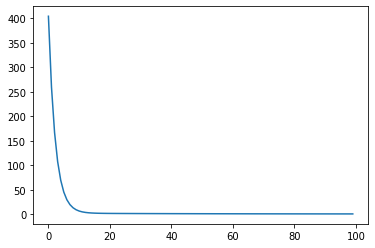

In [ ]:
def forward(x):
  return x * w + b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
  
# Goal : loss function을 최소화하는 w와 b를 찾음
w = torch.tensor(torch.randn(18), requires_grad=True)
b = torch.tensor([20.0], requires_grad=True)

history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(x_train)
  loss = criterion(Yhat,y_train)
  history.append(loss.item())
  loss.backward()   # loss를 w와 b로 미분
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  w.grad.data.zero_()
  b.grad.data.zero_()


print(b)
print(w)

import matplotlib.pyplot as plt
plt.plot(history)

yhat = forward(x_test)
print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))

c> stochastic(batch) gradient 
descent using Dataset and DataLoader (batchsize=32) like in Section 3 of 
Pytorch_2_linear_regression.ipynb file. Provide the test MAE and MSE also.

In [ ]:
train_data = TensorDataset(x_train, y_train)
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(x_test, y_test)
testloader= DataLoader(dataset = test_data, batch_size=32, shuffle=True)


tensor([-0.0069], requires_grad=True)
Parameter containing:
tensor([[-0.0833,  0.0923,  0.2237,  0.0088,  0.0089,  0.2051,  0.1008,  0.0301,
          0.3108,  0.3028,  0.0987, -0.2393,  0.0395, -0.0908,  0.2243, -0.0735,
          0.0883, -0.0501]], requires_grad=True)
test MAE:  tensor(0.3979, grad_fn=<MeanBackward0>)
test MSE:  tensor(0.3329, grad_fn=<MeanBackward0>)


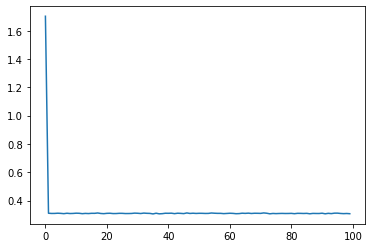

In [ ]:
forward = torch.nn.Linear(18,1, bias=False)
intercept = torch.tensor([-5.0], requires_grad=True) #[1,]
optimizer1 = torch.optim.SGD([intercept], lr=0.01)
optimizer2 = torch.optim.SGD([forward.weight], lr=0.01)

def myloss(yhat, y):
  return torch.mean((yhat-y)**2)
W = list(forward.parameters())[0]

history = []
epochs=100
N =  len(train_data)
lr=0.01
for epoch in range(epochs):
  epoch_loss = 0
  for x_train, y_train, in trainloader:
    yhat = forward(x_train) + intercept
    loss = myloss(yhat, y_train)
    loss.backward()
    optimizer1.step()
    optimizer2.step()
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    epoch_loss += loss * len(x_train)
  history.append(epoch_loss.item()/N)

plt.plot(history)

print(intercept)
print(W)

yhat = forward(x_test) + intercept
print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))

d> the custom layer. Provide the 
test MAE and MSE also.

[Parameter containing:
tensor([-0.0896], requires_grad=True), Parameter containing:
tensor([[ 0.1195,  0.1182,  0.1460, -0.1744,  0.1163,  0.1954,  0.0336, -0.0360,
          0.2725, -0.0747,  0.0986, -0.1883, -0.0058,  0.0050,  0.1457,  0.1170,
          0.1375,  0.1709]], requires_grad=True)]
test MAE:  tensor(0.4088, grad_fn=<MeanBackward0>)
test MSE:  tensor(0.4302, grad_fn=<MeanBackward0>)


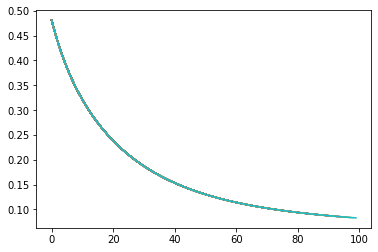

In [ ]:
train_data = TensorDataset(x_train, y_train)
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(x_test, y_test)
testloader= DataLoader(dataset = test_data, batch_size=32, shuffle=True)

import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, output_size, bias):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        self.b = nn.Parameter(torch.randn([1,]), requires_grad=True)

    def forward(self, x):
        yhat = x @ list(self.linear.parameters())[0].T
        yhat = yhat + self.b
        return yhat
def myloss(yhat, y):
    return torch.mean((yhat-y)**2)

model = Model(18,1, False)
optimizer = torch.optim.SGD(list(model.parameters()), lr = 0.01)

history = []
epochs=100
N =  len(train_data)
for epoch in range(epochs):
  epoch_loss = 0
  for xx, yy, in trainloader:
    yhat = model(xx)
    loss = myloss(yhat, yy)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    epoch_loss += loss * N
  history.append(epoch_loss.item()/N)

  plt.plot(history)

print(list(model.parameters()))

yhat = model(x_test)
print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))

2. Continued from Problem 1. 

a> Create the neural networks using `torch.nn.Sequential` and train the model. You 
may use arbitrary number of hidden layers and activation functions to get the 
better test MSE and MAE. Provide the test MAE and MSE also. (Your score will be 
based on your test MSE and MAE.)

test MAE:  tensor(0.3825, grad_fn=<MeanBackward0>)
test MSE:  tensor(0.5011, grad_fn=<MeanBackward0>)


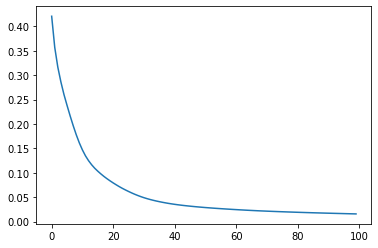

In [ ]:
train_data = TensorDataset(x_train, y_train)
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(x_test, y_test)
testloader= DataLoader(dataset = test_data, batch_size=32, shuffle=True)

DN = torch.nn.Sequential(
    torch.nn.Linear(18, 64), 
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32), 
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1), 
)

loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.1)
history = []

epochs=100
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(xx))

plt.plot(history)

yhat = DN(x_test)
print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))

b> Retrieve the weights and biases in the neural networks in part a, and use these 
weights and bias to calculate test MSE and MAE.

In [ ]:
W1 = DN.state_dict()['0.weight'].T
b1 = DN.state_dict()['0.bias']
W2 = DN.state_dict()['2.weight'].T
b2 = DN.state_dict()['2.bias']
W3 = DN.state_dict()['4.weight'].T
b3 = DN.state_dict()['4.bias']
relu = torch.nn.ReLU()
xx = relu(x_test @ W1+b1) 
xx = relu(xx @ W2+b2) 
yhat = xx @ W3+b3

print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))

test MAE:  tensor(0.3825)
test MSE:  tensor(0.5011)


c> Do the same thing as in part a, without using `torch.nn.Sequential function`, 
using weights and bias defined by `torch.tensor` function. Provide the test MAE 
and MSE also.

test MAE:  tensor(0.3588, grad_fn=<MeanBackward0>)
test MSE:  tensor(0.4010, grad_fn=<MeanBackward0>)


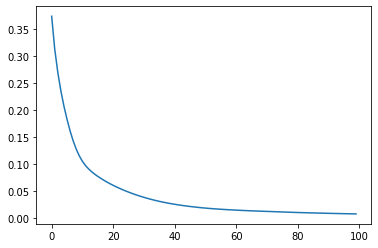

In [ ]:
train_data = TensorDataset(x_train, y_train)
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(x_test, y_test)
testloader= DataLoader(dataset = test_data, batch_size=32, shuffle=True)

DN1 = torch.nn.Linear(18, 64)
DN2 = torch.nn.ReLU()
DN3 = torch.nn.Linear(64, 32)
DN4 = torch.nn.ReLU()
DN5 = torch.nn.Linear(32, 1)
loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(list(DN1.parameters())+list(DN3.parameters())+list(DN5.parameters()), lr=0.1)


epochs=100
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    xx = DN1(xx)
    xx = DN2(xx)
    xx = DN3(xx)
    xx = DN4(xx)
    yhat = DN5(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(x_train))
plt.plot(history)

xx = DN1(x_test)
xx = DN2(xx)
xx = DN3(xx)
xx = DN4(xx)
yhat = DN5(xx)
print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))

d> Do the same thing as in part a using Custom Layer method. 

test MAE:  tensor(0.4069, grad_fn=<MeanBackward0>)
test MSE:  tensor(0.4825, grad_fn=<MeanBackward0>)


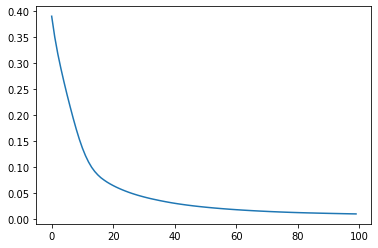

In [ ]:
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(18, 64)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(64, 32)
        self.linear3 = torch.nn.Linear(32, 1)
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

DN2 = my_dn2()
loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(DN2.parameters(), lr=0.1)
history = []

epochs=100
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN2(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

plt.plot(history)

yhat = DN2(x_test)
print("test MAE: ", torch.mean(torch.abs(y_test-yhat)))
print("test MSE: ", torch.mean((y_test-yhat)**2))